In [1]:
%matplotlib inline
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction import DictVectorizer as DV

In [2]:
df = pd.read_pickle('master_location.pkl')
df_crime = pd.read_pickle('crime.pkl')
vectorizer = DV()

In [3]:
# df_cluster = df[['area','type']]
df_cluster = df[['latitude','longitude','area','type']]
df_cluster = df_cluster[df_cluster.longitude < -157.5]
areas = list(set(df_cluster.area))
# areas_map = {area: idx for idx, area in enumerate(areas)}
# df_cluster.area = df_cluster.area.apply(lambda x: areas_map[x])
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5683 entries, 4333 to 227
Data columns (total 4 columns):
latitude     5683 non-null float64
longitude    5683 non-null float64
area         5683 non-null object
type         5683 non-null object
dtypes: float64(2), object(2)
memory usage: 222.0+ KB


In [4]:
df_t = df_cluster
df_t['area'] = df_t['area'].replace('',np.nan)
df_t = df_t.dropna()
df_t = df_t.T
df_t_dict = df_t.to_dict().values()
x = vectorizer.fit_transform(df_t_dict)
x.shape

/home/jlam17/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:840: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  "columns will be omitted.", UserWarning)


(4435, 70)

In [5]:
df_t.head()

,4333,4332,4331,4330,4329,4328,4327,4326,4325,4324,...,237,236,235,234,233,232,231,230,228,227
latitude,21.3516,21.3029,21.2862,21.2805,21.4724,21.3942,21.6761,21.2807,21.302,21.2936,...,21.2985,21.2985,21.3234,21.292,21.3227,21.2952,21.2779,21.2787,21.3392,21.3903
longitude,-157.858,-157.857,-157.809,-157.785,-158.01,-157.935,-157.952,-157.739,-157.85,-157.71,...,-157.84,-157.84,-157.865,-157.81,-157.861,-157.798,-157.755,-157.749,-157.866,-158.002
area,KALIHI,HONOLULU,KAIMUKI,WAIALAE,MILILANI,AIEA,KAHUKU,AINA HAINA,HONOLULU,HAWAII KAI,...,HONOLULU,HONOLULU,KALIHI,KAIMUKI,DOWNTOWN,KAIMUKI,AINA HAINA,AINA HAINA,KALIHI,WAIPAHU
type,MOTOR VEHICLE COLLISION,MOTOR VEHICLE COLLISION - TOWED,MOTOR VEHICLE COLLISION,MOTOR VEHICLE COLLISION,TRAFFIC NUISANCE OR PARKING VIOLATION,TRAFFIC NUISANCE OR PARKING VIOLATION,MOTOR VEHICLE COLLISION,MOTOR VEHICLE COLLISION,HAZARDOUS DRIVER,TRAFFIC SIGNAL PROBLEM,...,STALLED/HAZARDOUS VEHICLE,STALLED/HAZARDOUS VEHICLE,MOTOR VEHICLE COLLISION,MOTOR VEHICLE COLLISION,MOTOR VEHICLE COLLISION,MOTOR VEHICLE COLLISION,STALLED/HAZARDOUS VEHICLE,STALLED/HAZARDOUS VEHICLE,MOTOR VEHICLE COLLISION,MOTOR VEHICLE COLLISION


In [6]:
def evaluate_clusters(X,max_clusters):
    error = np.zeros(max_clusters+1)
    error[0] = 0;
    for k in range(1,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        error[k] = kmeans.inertia_

    plt.plot(range(1,len(error)),error[1:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Error')
    
def ri_evaluate_clusters(X,max_clusters,ground_truth):
    ri = np.zeros(max_clusters+1)
    ri[0] = 0;
    for k in range(1,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        ri[k] = metrics.adjusted_rand_score(kmeans.labels_,ground_truth)
    plt.plot(range(1,len(ri)),ri[1:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Adjusted Rand Index')

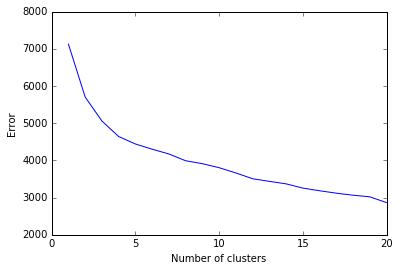

In [278]:
evaluate_clusters(x, 20)

In [43]:
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit_predict(x)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
error = kmeans.inertia_

In [44]:
# features = vectorizer.get_feature_names()
# lat_idx = features.index('latitude')
# lon_idx = features.index('longitude')

# d = []
# for idx, row in enumerate(x):
#     lat = x[lat_idx]
#     lon = x[lon_idx]
#     label = labels[idx]

asc_order_centroids = centroids.argsort()#[:, ::-1]
order_centroids = asc_order_centroids[:,::-1]
terms = vectorizer.get_feature_names()
for i in range(k):
    print("Cluster {}:".format(i))
    for ind in order_centroids[i, :20]:
        print(' {}'.format(terms[ind]))

Cluster 0:
 latitude
 type=MOTOR VEHICLE COLLISION
 area=KALIHI
 area=HONOLULU
 area=AIEA
 area=WAIPAHU
 area=PEARL CITY
 area=WAIKIKI
 area=MCCULLY
 area=KANEOHE
 area=KAIMUKI
 area=EWA BEACH
 area=KAPOLEI
 area=KAILUA
 area=DOWNTOWN
 area=MILILANI
 area=NUUANU
 area=WAHIAWA
 area=MANOA
 area=HAWAII KAI
Cluster 1:
 latitude
 type=TRAFFIC NUISANCE OR PARKING VIOLATION
 area=KALIHI
 area=AIEA
 area=PEARL CITY
 area=DOWNTOWN
 area=KAILUA
 area=KANEOHE
 area=HONOLULU
 area=WAIPAHU
 area=EWA BEACH
 area=KAIMUKI
 area=NUUANU
 area=MILILANI
 area=AIRPORT
 area=PUNCHBOWL
 area=MCCULLY
 area=WAHIAWA
 area=MOANALUA V
 area=WAIANAE
Cluster 2:
 latitude
 type=STALLED/HAZARDOUS VEHICLE
 type=TRAFFIC SIGNAL PROBLEM
 area=AIEA
 type=MOTOR VEHICLE COLLISION - TOWED
 area=PEARL CITY
 type=TRAFFIC INCIDENT - NO COLLISION
 area=KALIHI
 area=HONOLULU
 area=KANEOHE
 area=WAIPAHU
 area=NUUANU
 area=EWA BEACH
 area=KAPOLEI
 area=KAIMUKI
 area=WAIPIO
 area= 
 area=MOANALUA V
 area=DOWNTOWN
 area=WAIKIKI
Clus

In [45]:
vector = vectorizer.inverse_transform(x)
for idx, point in enumerate(vector):
    point['kmeans'] = labels[idx]

df = pd.DataFrame(vector)
df = df.fillna(0)

df.head()

,area=AIEA,area=AINA HAINA,area=AIRPORT,area=ALA MOANA,area=ALIAMANU,area=DOWNTOWN,area=EWA BEACH,area=FT DERUSSY,area=HALEIWA,area=HAUULA,...,kmeans,latitude,longitude,type=HAZARDOUS DRIVER,type=MOTOR VEHICLE COLLISION,type=MOTOR VEHICLE COLLISION - TOWED,type=STALLED/HAZARDOUS VEHICLE,type=TRAFFIC INCIDENT - NO COLLISION,type=TRAFFIC NUISANCE OR PARKING VIOLATION,type=TRAFFIC SIGNAL PROBLEM
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,21.375317,-158.028414,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,21.309254,-157.811282,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,21.271222,-157.822642,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,21.289003,-157.811313,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,21.330344,-157.865007,0.0,1.0,0.0,0.0,0.0,0.0,0.0


['type=MOTOR VEHICLE COLLISION', 'type=TRAFFIC NUISANCE OR PARKING VIOLATION', 'type=STALLED/HAZARDOUS VEHICLE', 'type=HAZARDOUS DRIVER']


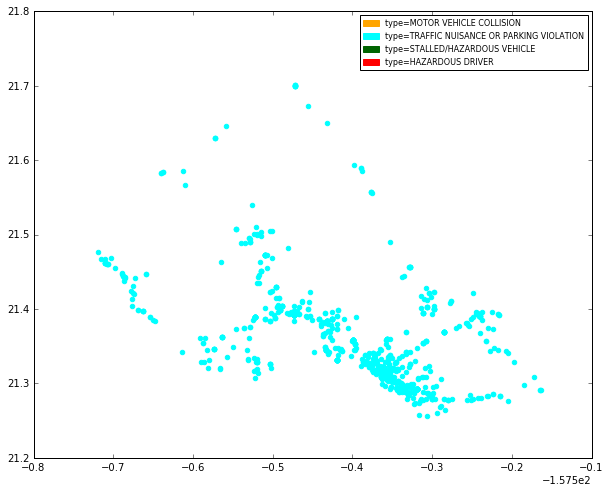

In [55]:
x_coord = df['longitude'].values
y_coord = df['latitude'].values
labels = df['kmeans'].values
colors = ['orange', 'cyan', 'darkgreen', 'red', 'blue', 'yellow', 'purple', 'black']

# labels = list(df.columns.values)
# print("Top terms per cluster:")
# asc_order_centroids = kmeans.cluster_centers_.argsort()#[:, ::-1]
# order_centroids = asc_order_centroids[:,::-1]
# included = set(['longitude','latitude'])
# cluster_label = []
# for i in range(7):
#     for ind in order_centroids[i, :10]:
#         if labels[ind] not in included:
#             cluster_label.append(labels[ind])
#             included.add(labels[ind])
#             break

asc_order_centroids = centroids.argsort()#[:, ::-1]
order_centroids = asc_order_centroids[:,::-1]
terms = vectorizer.get_feature_names()
cluster_label = []
for i in range(k):
    for index in order_centroids[i, :10]:
        if 'type' in terms[index]:
            cluster_label.append(terms[index])
            break
        
print(cluster_label)
p1 = plt.Rectangle((0,0), 0.1, 0.1, color=colors[0])
p2 = plt.Rectangle((0,0), 0.1, 0.1, color=colors[1])
p3 = plt.Rectangle((0,0), 0.1, 0.1, color=colors[2])
p4 = plt.Rectangle((0,0), 0.1, 0.1, color=colors[3])
p5 = plt.Rectangle((0,0), 0.1, 0.1, color=colors[4])
p6 = plt.Rectangle((0,0), 0.1, 0.1, color=colors[5])
p7 = plt.Rectangle((0,0), 0.1, 0.1, color=colors[6])

plt.figure(figsize=(10,8))
for i, l in enumerate(labels):
    if int(l) is 1:
        plt.scatter(x_coord[i], y_coord[i], color = colors[l])
    
plt.legend((p1,p2,p3,p4,p5,p6,p7), cluster_label ,loc='upper right', prop={'size':8})

In [48]:
type(labels[0])

numpy.int64